**Objective**
* EDA and Vizualization

Go to [Summary](#summary).

----
## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

----

## Helper Function

In [2]:
# Summarize Numeric Feature
def numeric_summarize(data, x):
    # Get Stats Informations
    mx = data[x].max()
    mn = data[x].min()
    avg = data[x].mean()
    q3 = data[x].quantile(0.75)
    q1 = data[x].quantile(0.25)
    iqr = q3 - q1
    upper_fence = q3 + 1.5 * iqr
    lower_fence = q1 - 1.5 * iqr
    
    print(f"Max = {mx}\nMin = {mn}\nMean = {avg}")
    print(f"Upper Fence = {upper_fence}\nLower Fence = {lower_fence}")
    # Plot
    plt.figure(figsize = (20, 5))
    # Box Plot 
    plt.subplot(1, 2, 1)
    sns.boxplot(x = data[x])
    # Dist plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(x = data[x], shade = True, color = 'red')


In [3]:
def remove_outlires(data, col_name):
    assert col_name in data.columns, "Column Didn't found in given data"
    q3 = data[col_name].quantile(0.75)
    q1 = data[col_name].quantile(0.25)
    iqr = q3 - q1
    upper_fence = q3 + 1.5 * iqr
    lower_fence = q1 - 1.5 * iqr
    print(f'Upper Fence = {upper_fence} , Lower Fence = {lower_fence}')
    data.drop(data[ (data[col_name] > upper_fence) | (data[col_name] < lower_fence) ].index, inplace = True)

---

In [4]:
# read dataset
data = pd.read_csv('players.csv')

In [5]:
data.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4700 non-null   object 
 1   Position      4700 non-null   object 
 2   Age           4700 non-null   int64  
 3   Team_from     4700 non-null   object 
 4   League_from   4700 non-null   object 
 5   Team_to       4700 non-null   object 
 6   League_to     4700 non-null   object 
 7   Season        4700 non-null   object 
 8   Market_value  3440 non-null   float64
 9   Transfer_fee  4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


In [7]:
print(f"There is {data['Market_value'].isna().sum()} Null value in Market Value")

There is 1260 Null value in Market Value


In [8]:
# We will add Transfer fee to null in market value because it may be close to it
data.loc[data['Market_value'].isna(), 'Market_value'] = data.loc[data['Market_value'].isna(), 'Transfer_fee']

In [9]:
# Check Null Again 
data.isna().sum()

Name            0
Position        0
Age             0
Team_from       0
League_from     0
Team_to         0
League_to       0
Season          0
Market_value    0
Transfer_fee    0
dtype: int64

In [10]:
data.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,60000000.0,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,56810000.0,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,40000000.0,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,36150000.0,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,34500000.0,34500000


## Numeric Feature Preprocessing

Max = 35
Min = 0
Mean = 24.33872340425532
Upper Fence = 34.5
Lower Fence = 14.5


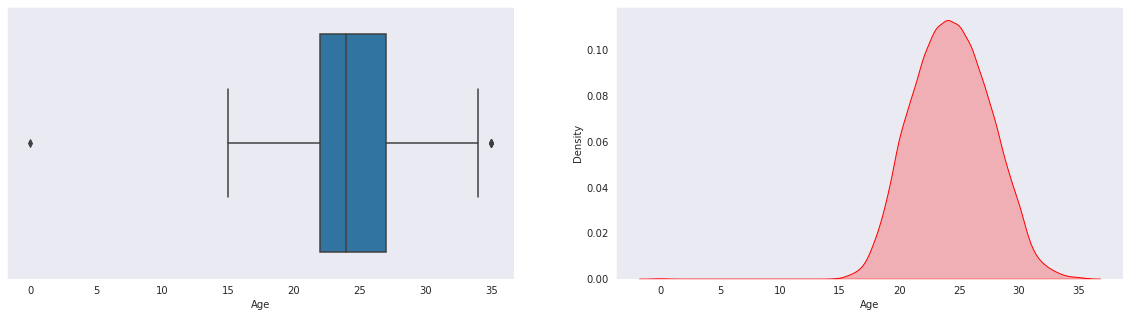

In [11]:
# Age
numeric_summarize(data, 'Age')

* It seem that there is a Problem in Dataset there is a player that has 0 Age

In [12]:
remove_outlires(data = data, col_name = 'Age')

Upper Fence = 34.5 , Lower Fence = 14.5


Max = 34
Min = 15
Mean = 24.33482428115016
Upper Fence = 34.5
Lower Fence = 14.5


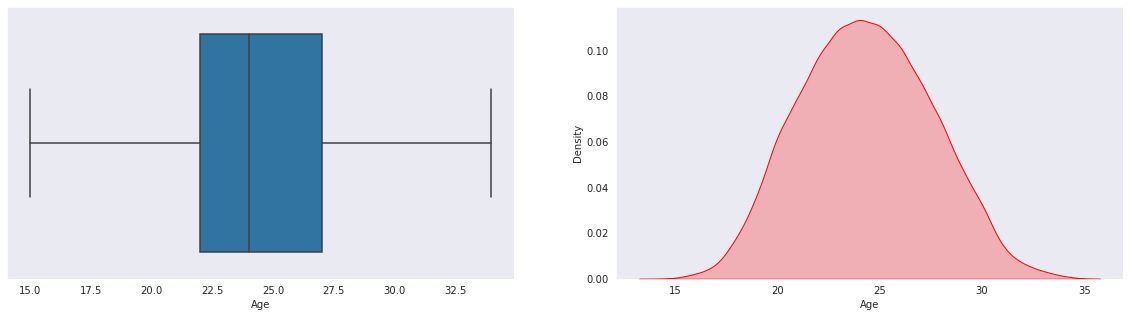

In [13]:
# Let's see the distripution again
numeric_summarize(data, 'Age')

In [14]:
# What is the std for our ages
data['Age'].std()

3.197838807037852

* Now age is normally distributed
* Most of our range ages between `21-27`

Max = 120000000.0
Min = 50000.0
Mean = 7965701.810436634
Upper Fence = 20500000.0
Lower Fence = -7500000.0


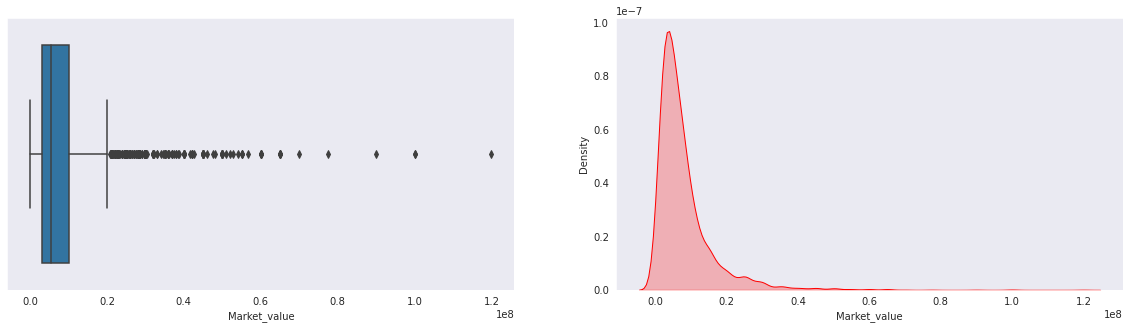

In [15]:
# Market value
numeric_summarize(data, 'Market_value')

In [16]:
# Let's see the percentage of outliers in Market value
(len(data[ data['Market_value'] > 20500000.0 ]) / len(data)) * 100

6.411075612353567

In [17]:
remove_outlires(data = data, col_name = 'Market_value')

Upper Fence = 20500000.0 , Lower Fence = -7500000.0


* There is only `6.4%` of our data is outliers so we remove them

Max = 20000000.0
Min = 50000.0
Mean = 6282098.315885298
Upper Fence = 16750000.0
Lower Fence = -5250000.0


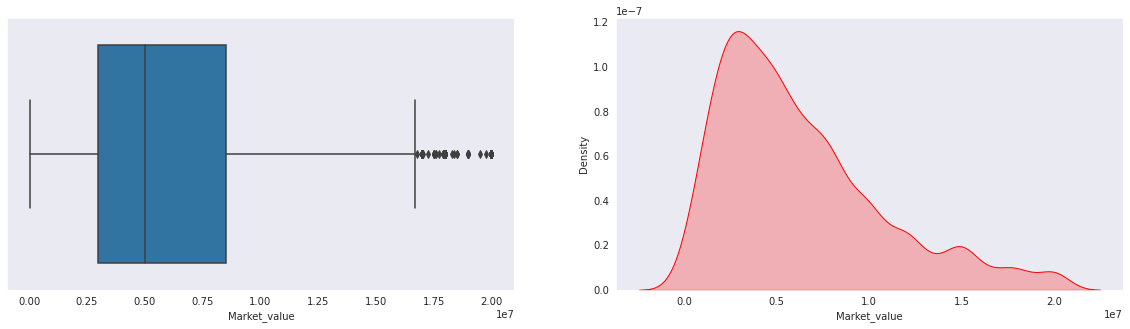

In [18]:
# Let's show the distribution again 
numeric_summarize(data, 'Market_value')

In [19]:
# What is the std for Market value ?
data['Market_value'].std()

4467567.227505901

* Most of Market value is between `1814531 $ - 10749665 $`

Max = 60000000
Min = 825000
Mean = 7650208.238507055
Upper Fence = 18500000.0
Lower Fence = -4700000.0


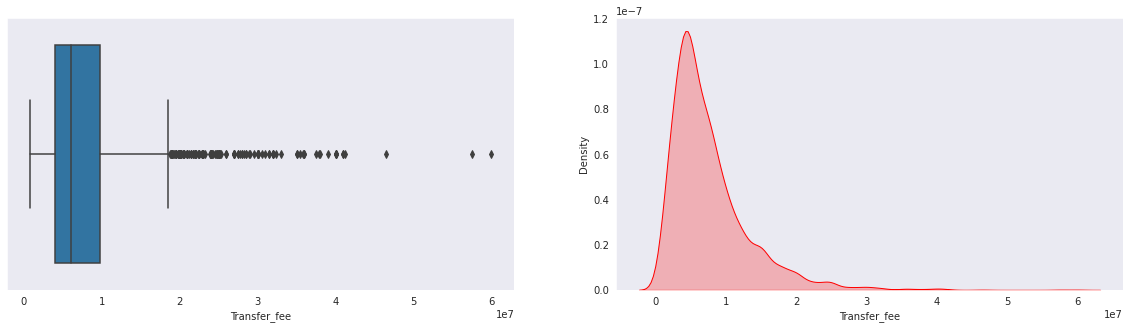

In [20]:
# Transfer fee
numeric_summarize(data, 'Transfer_fee')

In [21]:
# Let's see the percentage of outliers in Transfer fee
(len(data[ data['Transfer_fee'] > 18500000 ]) / len(data)) * 100

4.893035958124716

In [22]:
remove_outlires(data = data, col_name = 'Transfer_fee')

Upper Fence = 18500000.0 , Lower Fence = -4700000.0


* There is 4.8% of transfer fee is outliers so we drop it 
* Now we have only 90% from our datatset

Max = 18500000
Min = 825000
Mean = 6773537.9277339075
Upper Fence = 16500000.0
Lower Fence = -3500000.0


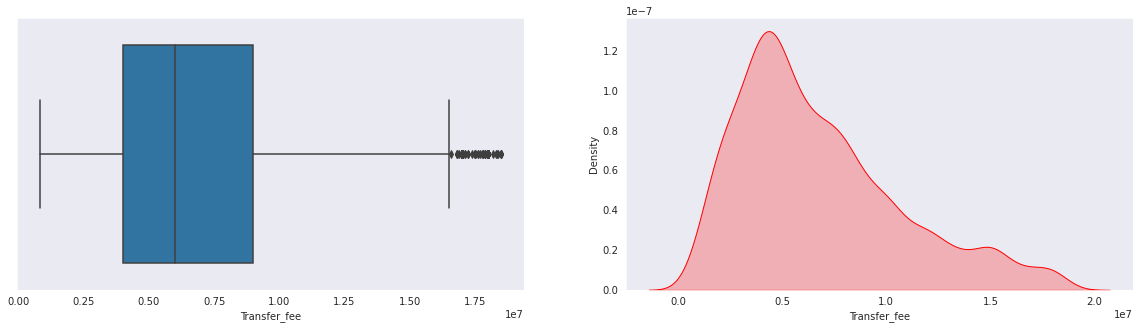

In [23]:
# Transfer fee again
numeric_summarize(data, 'Transfer_fee')

In [24]:
# What is the std for Transfer fee
data['Transfer_fee'].std()

3939020.370396169

* Most of our Transfer fee around `2834517$ - 10712557$`

## EDA

In [25]:
# How many positions did we have ?
data['Position'].nunique()

17

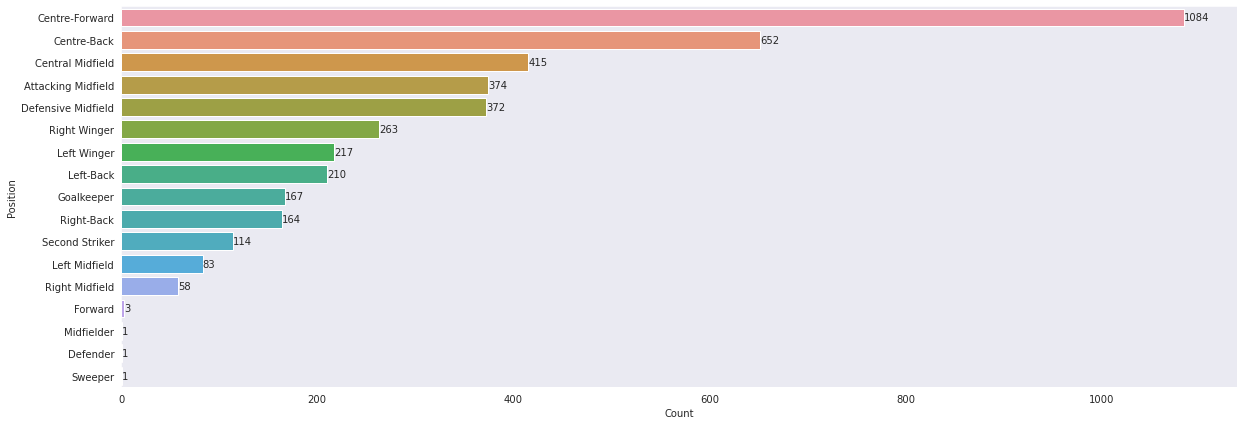

In [26]:
# What is the value of each position ?
plt.figure(figsize = (20, 7))
df = data['Age'].groupby(data['Position']).count().reset_index().rename(columns= {'Age' : 'Count'}).sort_values(by = 'Count', ascending = False)
ax = sns.barplot(y = df['Position'], x = df['Count'])
for i in ax.containers:
    ax.bar_label(i)

* We have `1084` `Center-Forward` which the max in our dataset
* We have `1` for `[Sweeper, Defender, Midfielder]` which the min

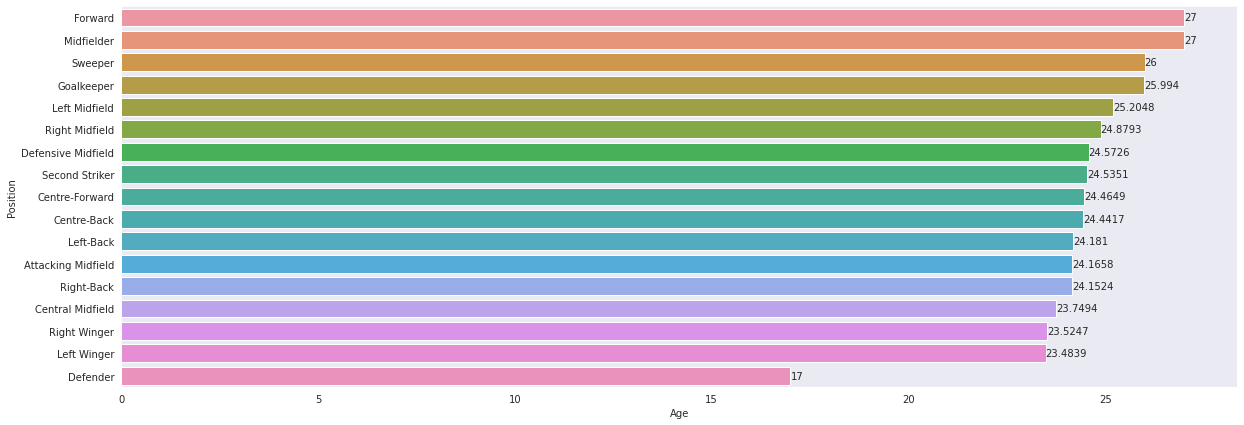

In [27]:
# What is the average age for each Position ?
plt.figure(figsize = (20, 7))
df = data['Age'].groupby(data['Position']).mean().reset_index().sort_values(by = 'Age', ascending = False)
ax = sns.barplot(y = df['Position'], x = df['Age'])
for i in ax.containers:
    ax.bar_label(i)

* Defenders has the least average with `17 Y`

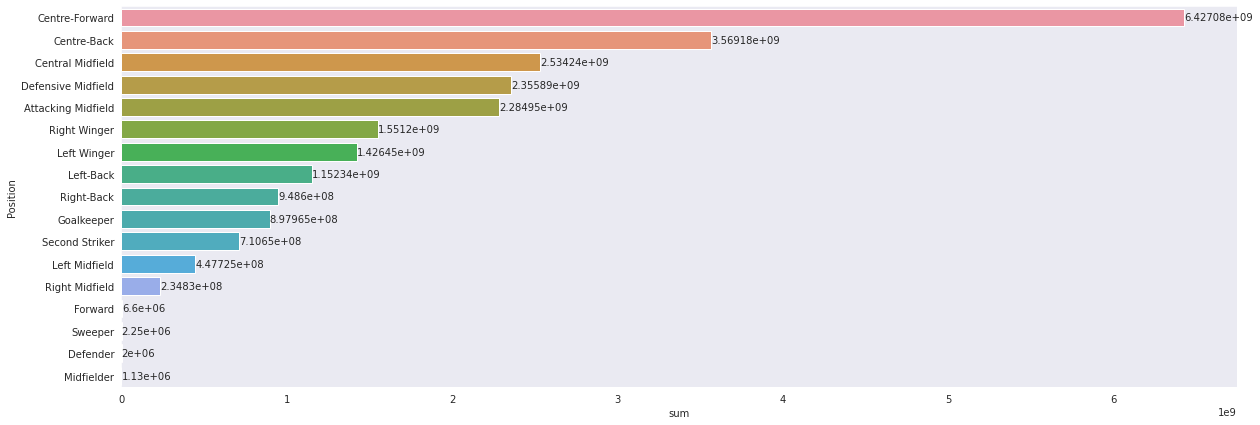

In [28]:
# Which Position has the max Market value ?
plt.figure(figsize = (20, 7))
df_market_value = data['Market_value'].groupby(data['Position']).sum().reset_index().rename(columns= {'Market_value' : 'sum'}).sort_values(by = 'sum', ascending = False)
ax = sns.barplot(y = df_market_value['Position'], x = df_market_value['sum'])
for i in ax.containers:
    ax.bar_label(i)

* Players whos play in center has the max Market value

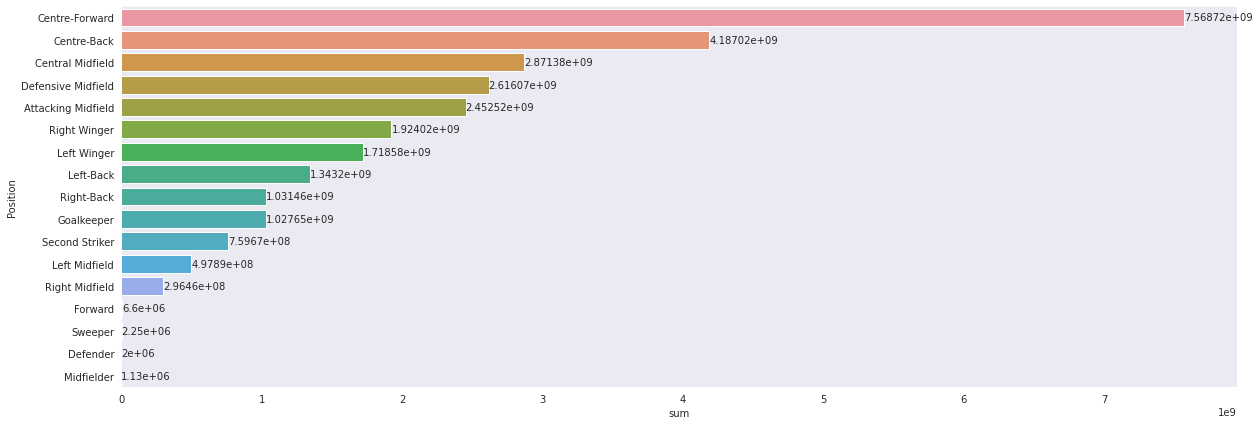

In [29]:
# Which Position has the max Transfer fee ?
plt.figure(figsize = (20, 7))
df_tansfer_fee = data['Transfer_fee'].groupby(data['Position']).sum().reset_index().rename(columns= {'Transfer_fee' : 'sum'}).sort_values(by = 'sum', ascending = False)
ax = sns.barplot(y = df_tansfer_fee['Position'], x = df_tansfer_fee['sum'])
for i in ax.containers:
    ax.bar_label(i)

In [30]:
# Is there any one who market value is greater than transfer fee ?
df_market_value > df_tansfer_fee

,Position,sum
3,False,False
2,False,False
1,False,False
5,False,False
0,False,False
13,False,False
9,False,False
10,False,False
14,False,False
7,False,False


* The tranfer fee for Players whos play in center is the max
* Transfer fee for Players who play in center is larger than market value

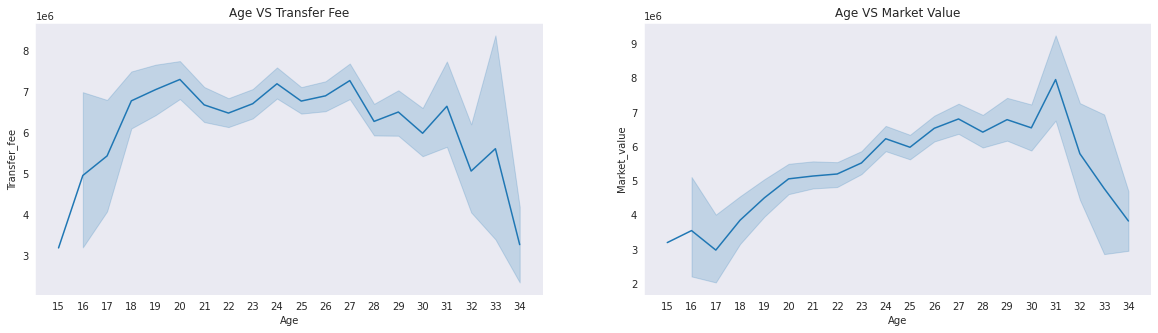

In [31]:
# is there relationship between age and Transfer fee or market value ?
plt.figure(figsize = (20, 5))

plt.subplot(1, 2, 1)
plt.title("Age VS Transfer Fee")
sns.lineplot(x = data['Age'], y = data['Transfer_fee']);
plt.xticks(range(15, 35));

plt.subplot(1, 2, 2)
plt.title("Age VS Market Value")
sns.lineplot(x = data['Age'], y = data['Market_value']);
plt.xticks(range(15, 35));

* Ages between 17- 32 have the high transfer fee and Market value

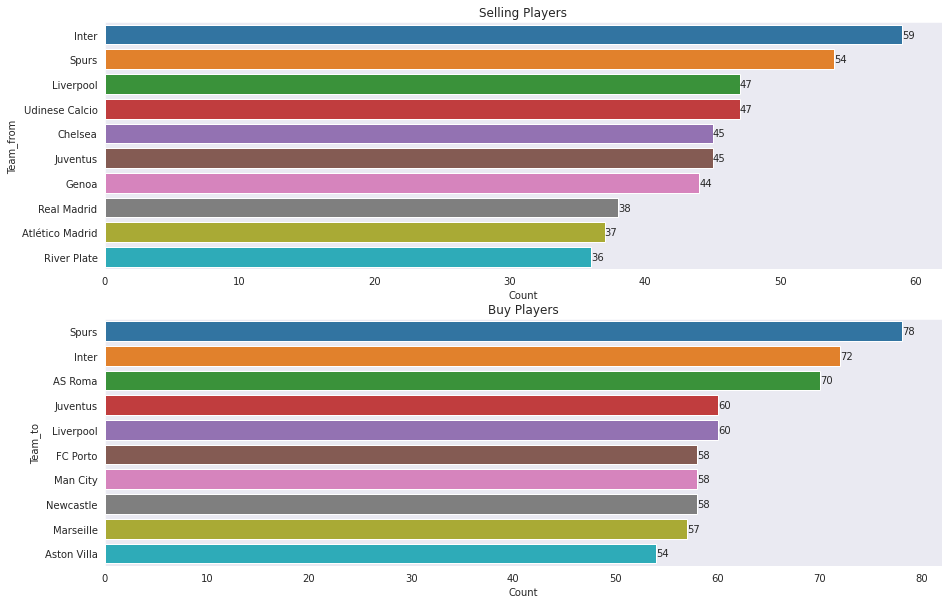

In [32]:
# Top 10 Clubs selling players ?
plt.figure(figsize = (15, 10))

plt.subplot(2, 1, 1)
plt.title("Selling Players")
top_10_teams = data['Name'].groupby(data['Team_from']).count().reset_index().rename(columns = {'Name' : 'Count'}).sort_values(by = 'Count', ascending = False).head(10)
ax = sns.barplot(y = top_10_teams['Team_from'], x = top_10_teams['Count']);
for i in ax.containers:
    ax.bar_label(i)
    
# Top 10 Clubs buy players ?
plt.subplot(2, 1, 2)
plt.title("Buy Players")
top_10_teams = data['Name'].groupby(data['Team_to']).count().reset_index().rename(columns = {'Name' : 'Count'}).sort_values(by = 'Count', ascending = False).head(10)
ax = sns.barplot(y = top_10_teams['Team_to'], x = top_10_teams['Count']);
for i in ax.containers:
    ax.bar_label(i)

* Intermelan is the most selling players team `59` Player
* Spurs is the most club that buy players
* There is club such as Aston villa, Marseille, NewCastle, Man city, FC Porto buy players more than selling players

In [33]:
# What is the average age the best 10 teams selling ?
top_10_teams = data['Name'].groupby(data['Team_from']).count().reset_index().rename(columns = {'Name' : 'Count'}).sort_values(by = 'Count', ascending = False).head(10)
team_names = top_10_teams['Team_from'].values
df = data[ (data['Team_from'].isin(team_names)) ]['Age']
#top_10_teams
print(f"Top 10 Teams Sell players with age between {round(df.mean() - df.std(), 1)} - {round(df.mean() + df.std(), 1)} Y")

Top 10 Teams Sell players with age between 21.8 - 28.3 Y


In [34]:
# What is the average transfer fee the best 10 teams selling ?
top_10_teams = data['Name'].groupby(data['Team_to']).count().reset_index().rename(columns = {'Name' : 'Count'}).sort_values(by = 'Count', ascending = False).head(10)
team_names = top_10_teams['Team_to'].values
df = data[ (data['Team_from'].isin(team_names)) ]['Transfer_fee']
print(f"Top 10 Teams Sell players with Transfer fee between {round(df.mean() - df.std(), 1)} $ - {round(df.mean() + df.std(), 1)} $")

Top 10 Teams Sell players with Transfer fee between 3645633.3 $ - 11988094.2 $


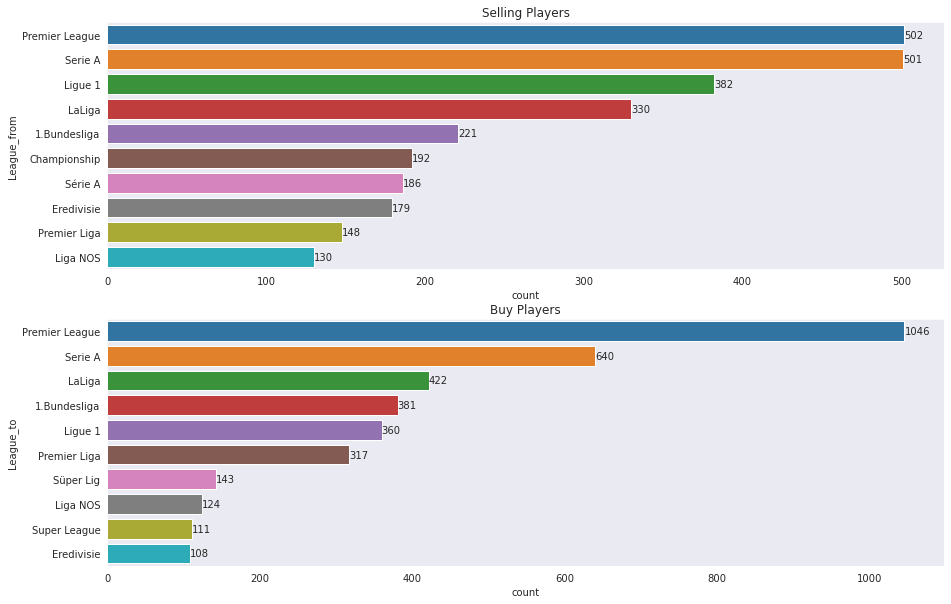

In [35]:
# Whos the most 10 League sell players ?
plt.figure(figsize = (15, 10))

plt.subplot(2, 1, 1)
plt.title("Selling Players")
top_10_leagues = data['Name'].groupby(data['League_from']).count().reset_index().rename(columns = {'Name' : 'count'}).sort_values(by = 'count', ascending = False).head(10)
ax = sns.barplot(y = top_10_leagues['League_from'], x = top_10_leagues['count']);
for i in ax.containers:
    ax.bar_label(i)

plt.subplot(2, 1, 2)
plt.title("Buy Players")
top_10_leagues = data['Name'].groupby(data['League_to']).count().reset_index().rename(columns = {'Name' : 'count'}).sort_values(by = 'count', ascending = False).head(10)
ax = sns.barplot(y = top_10_leagues['League_to'], x = top_10_leagues['count']);
for i in ax.containers:
    ax.bar_label(i)

* Premier League, Serie A is the top 2 Selling Players and buy players

In [36]:
# What is the average age the best 10 teams selling ?
top_10_leagues = data['Name'].groupby(data['League_from']).count().reset_index().rename(columns = {'Name' : 'count'}).sort_values(by = 'count', ascending = False).head(10)
league_names = top_10_leagues['League_from'].values
df = data[ (data['League_from'].isin(league_names)) ]['Age']
print(f"Top 10 Leauge Sell players with age between {round(df.mean() - df.std(), 1)} - {round(df.mean() + df.std(), 1)} Y")

Top 10 Leauge Sell players with age between 21.6 - 27.9 Y


In [37]:
# What is the average age the best 10 teams buy ?
top_10_leagues = data['Name'].groupby(data['League_to']).count().reset_index().rename(columns = {'Name' : 'count'}).sort_values(by = 'count', ascending = False).head(10)
league_names = top_10_leagues['League_to'].values
df = data[ (data['League_to'].isin(league_names)) ]['Transfer_fee']
print(f"Top 10 Leauge Sell players with Transfer fee between {round(df.mean() - df.std(), 1)} - {round(df.mean() + df.std(), 1)} Y")

Top 10 Leauge Sell players with Transfer fee between 3030470.8 - 10981377.5 Y


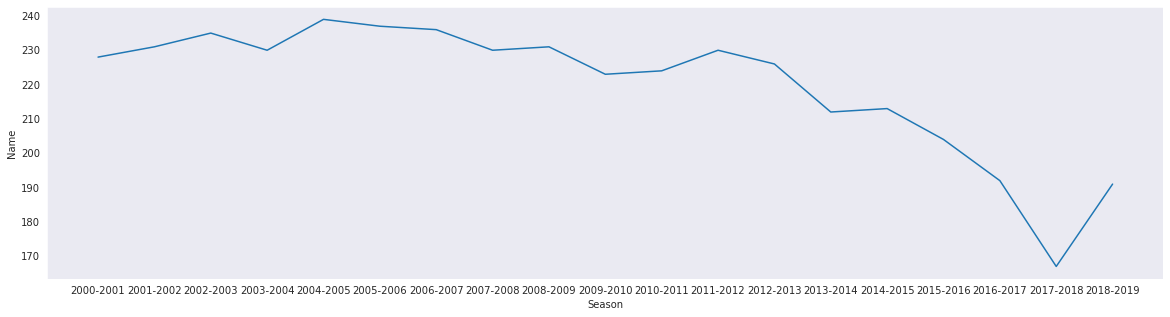

In [38]:
# Number of selling players and Seasons ?
plt.figure(figsize = (20, 5))
df = data['Name'].groupby(data['Season']).count().reset_index()
sns.lineplot(x = df['Season'], y = df['Name']);

* Increasing in Seasons mean that there is Decreasing of Selling Players

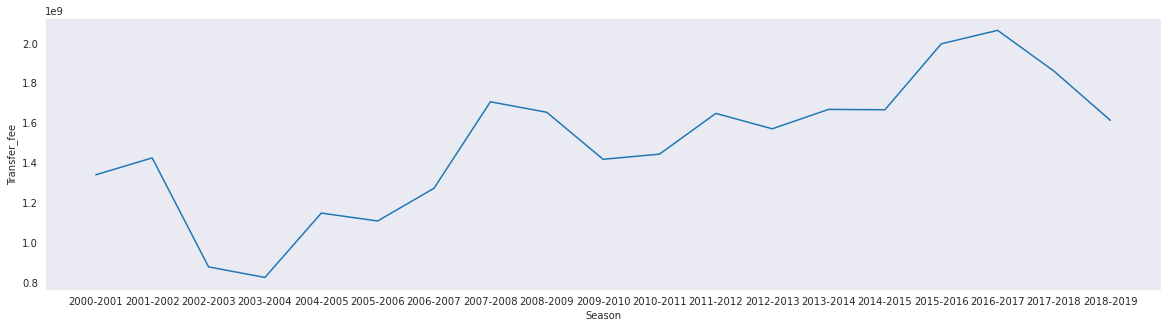

In [39]:
plt.figure(figsize = (20, 5))
df = data['Transfer_fee'].groupby(data['Season']).sum().reset_index()
sns.lineplot(x = df['Season'], y = df['Transfer_fee']);

* Increasing in seasons mean Increasing of Transfer fee

<AxesSubplot:xlabel='Season', ylabel='Position'>

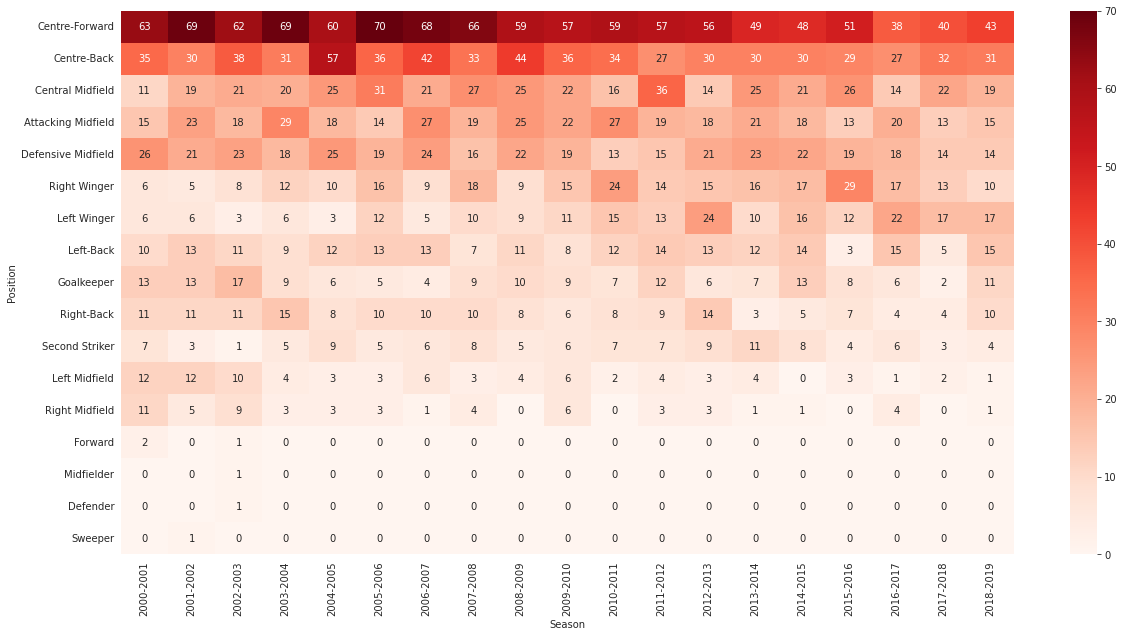

In [40]:
# What is the Max Position sold in each season ?
plt.figure(figsize = (20, 10))
df = data['Name'].groupby([data['Position'], data['Season']]).count().reset_index().rename(columns = {'Name' : 'count'})
df = df.pivot_table(columns = 'Season', index = 'Position', values = 'count').fillna(0)
#sns.heatmap(df, cmap = "Reds", annot = True, fmt = '0.1f', linewidth = 1);
df['Total'] = df.sum(axis = 1)
df = df.sort_values(by = 'Total', ascending = False)
sns.heatmap(df.iloc[:, :-1], cmap = "Reds", annot = True)

* Most position occure in each season is Center Fowrward
* Top 4 Postions occure [Center-Forward, Center-Back, Center-Midfield, Attacking-Midfield]
* Last 4 Postions [Sweeper, Midfielder, Fowrard, Defender]

<a id=’summary’></a>
## Summary

**Age**
* Most of our ages between 21-27 years old

**Market Value**
* Most of our market value between `1814531$ - 10749665$`

**Transfer Fee**
* Most of our Transfer fee around `2834517$ - 10712557$`
* Players between 17-32 Has the best Market value and Transfer fee

**Position**
* The Most Players sold who's playing in Center-Forward Position
* Players who's position in center has the best Market value and transfer fee
* Top 5 Positions Sold over seasons [Center-Forward, Center-Back, Central-Midfield, Attacking-Midfield, Defensive-Midfield]
* Botton 4 Positions sold over seasons [Forward, Midfielder, Defender, Sweeper]

**Teams**
* Most team is selling PLayers is Inter he sold 59 Player over all seasons
* Most Team is buing players is Spurs he buy 78 Player over all Seasons
* Clup such as Aston Villa, Man City Marseliie buy players more than selling players

**League**
* Top 2 Leagues Selling Players Premier League and Serie A thy sold `502, 501` Player over all Seasons

**Seasons**
* Number of players sold is descreased while seasons is increased
* Transfer fee for each season get greater than the last season